# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from clean_dataset import import_csv_data
from scipy.stats import lognorm, norm
import scipy.stats as stats
from clean_immo_datasetV2 import encode_categorical_features, preprocess_missing_values

#### Load CSV

#### ML csv

In [4]:
file_path = 'ml_ready_real_estate_data.csv'
df_encoded = import_csv_data(file_path)
df_encoded

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


#### Optional encoding

In [ ]:
df_wo_missing = preprocess_missing_values(raw_df)

In [ ]:
df_wo_missing

In [ ]:

df_encoded, encoders = encode_categorical_features(df_wo_missing)


In [ ]:
encoders

In [ ]:
df_encoded

#### Identifying the type of variables

In [5]:
df_encoded.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

## Outliers

In [12]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [13]:
def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] <= lower)], df[(df[col] >= upper)]

In [9]:
price_w_out = df_encoded['price']

In [10]:
log_bins = np.logspace(np.log10(price_w_out.min()), np.log10(price_w_out.max()), 50)

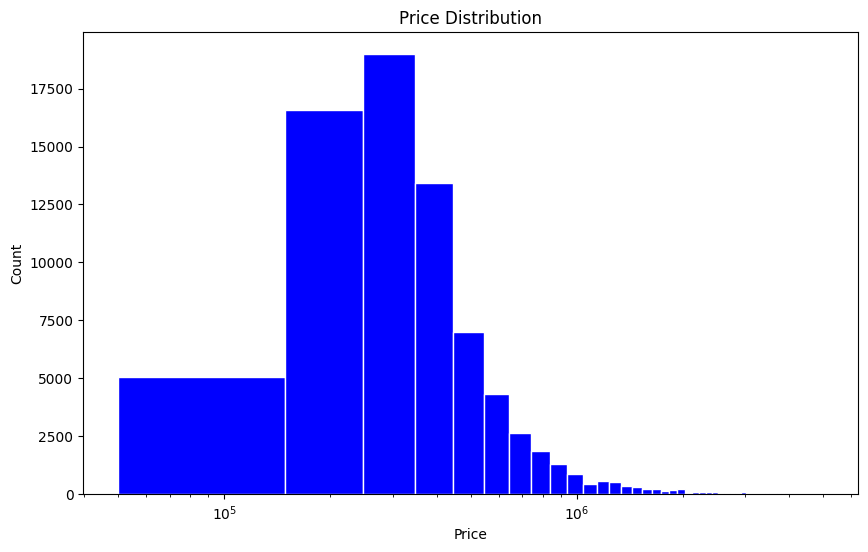

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['price'], bins=50,  color='blue', edgecolor='white')
plt.xscale('log')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('images/price_distribution.png')
plt.show()

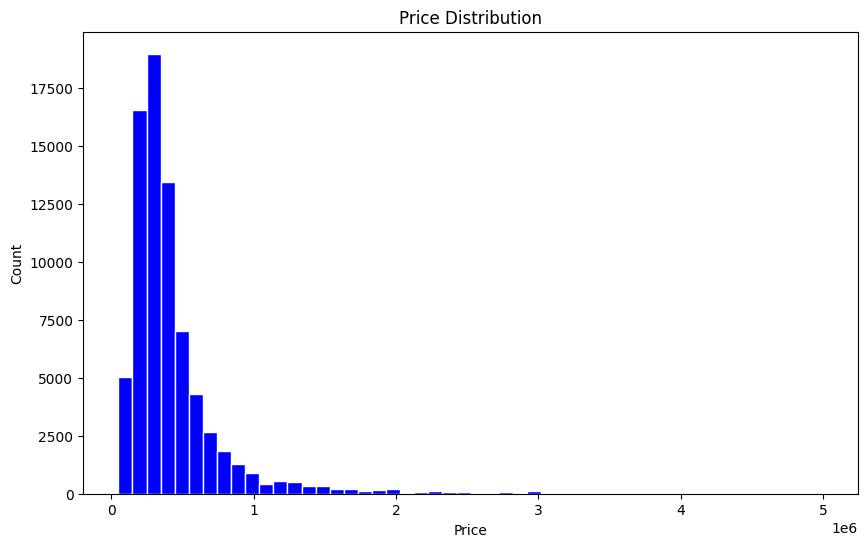

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['price'], bins=50,  color='blue', edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('images/price_distribution.png')
plt.show()

#### Outliers for price

In [11]:
df_encoded['price'].describe()

count    7.610300e+04
mean     4.351276e+05
std      4.127531e+05
min      5.000000e+04
25%      2.310000e+05
50%      3.295000e+05
75%      4.790000e+05
max      5.000000e+06
Name: price, dtype: float64

In [ ]:
lower_outliers, upper_outliers = identify_outliers_iqr(df_encoded, 'price')

In [ ]:
lower_outliers

In [ ]:
upper_outliers['subtype_encoded']

In [ ]:
df_wo_price_outliers = remove_outliers_iqr(df_encoded, 'price')

In [ ]:
df_wo_price_outliers['price'].describe()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_wo_price_outliers['price'], bins=50, color='green', edgecolor='white')
plt.title('Price Distribution (without Outliers)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('images/price_distribution_wout_outliers.png')
plt.show()

#### Price distribution with density line

In [ ]:
data_price_ml = df_wo_price_outliers['price']

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_price_ml, bins=50, stat='density', color='green', edgecolor='white')

shape, loc, scale = lognorm.fit(data_price_ml, floc=0)

x = np.linspace(data_price_ml.min(), data_price_ml.max(), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.plot(x, pdf, 'b', linewidth=2, label='Log-normal fit')
plt.title('Price Distribution (without Outliers) and log-normal fitted')
plt.savefig('images/price_distribution_wout_outliers_log_normal.png')
plt.xlabel('Price')
plt.ylabel('Count')

#### Analyzing Outliers

##### By Subtype

In [ ]:
num_bins = len(upper_outliers['subtype'].unique())
num_bins

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=upper_outliers, x='subtype', color='pink', edgecolor='white')
plt.xticks(rotation=90)
plt.title('Outliers price dsitribution by subtype')

## Correlation Analysis

### Correlation for Continuous variables

In [ ]:
df_continuous = df_encoded.select_dtypes(include='float64')
df_continuous = df_continuous.drop(columns=['locality_encoded'])
df_continuous.columns

In [ ]:
df_continuous = df_continuous.loc[:, ['price','bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'totalParkingCount', 'epcScore_encoded']]  

print(df_continuous)

In [ ]:
corr_matrix_cont = df_continuous.corr()
corr_matrix_cont

In [ ]:
plt.figure(figsize=(13, 13))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr_matrix_cont, cmap ='RdBu', vmin =-1, vmax=1, annot =True, square = True, annot_kws = {'fontsize': 15})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 16)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 16)
plt.rcParams.update({'font.size': 20})
plt.savefig('images/corr_matrix_continuos.png', pad_inches = 3)
plt.show()

#### Correlation for boolean

In [4]:
boolean_cols = df_encoded.columns[df_encoded.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


##### Analysis with Point-biserial correlation

In [5]:
point_biserial_corr = dict()

for col in boolean_cols:
    point_biserial_corr[col] = stats.pointbiserialr(df_encoded[col], df_encoded['price']).statistic

In [6]:
for k,v in point_biserial_corr.items():
    print(f"Correlation with {k} : {v}")

Correlation with hasAttic_encoded : -0.014810884949773449
Correlation with hasGarden_encoded : 0.05347581012342016
Correlation with hasAirConditioning_encoded : 0.06695280400920212
Correlation with hasArmoredDoor_encoded : 0.11081100891066585
Correlation with hasVisiophone_encoded : 0.10493232479232839
Correlation with hasTerrace_encoded : 0.0812269774141897
Correlation with hasOffice_encoded : 0.1884184115432811
Correlation with hasSwimmingPool_encoded : 0.24868448967233475
Correlation with hasFireplace_encoded : 0.1262900219632501
Correlation with hasBasement_encoded : 0.024430601412475335
Correlation with hasDressingRoom_encoded : 0.09743258538901886
Correlation with hasDiningRoom_encoded : 0.05771560005779141
Correlation with hasLift_encoded : 0.025523833656135735
Correlation with hasHeatPump_encoded : 0.06467200611918142
Correlation with hasPhotovoltaicPanels_encoded : 0.05403369633133076
Correlation with hasLivingRoom_encoded : -0.040189008253493405


In [7]:
sorted_bool_correlation = dict(sorted(point_biserial_corr.items(), key=lambda x:x[1], reverse = True))
sorted_bool_correlation 

{'hasSwimmingPool_encoded': np.float64(0.24868448967233475),
 'hasOffice_encoded': np.float64(0.1884184115432811),
 'hasFireplace_encoded': np.float64(0.1262900219632501),
 'hasArmoredDoor_encoded': np.float64(0.11081100891066585),
 'hasVisiophone_encoded': np.float64(0.10493232479232839),
 'hasDressingRoom_encoded': np.float64(0.09743258538901886),
 'hasTerrace_encoded': np.float64(0.0812269774141897),
 'hasAirConditioning_encoded': np.float64(0.06695280400920212),
 'hasHeatPump_encoded': np.float64(0.06467200611918142),
 'hasDiningRoom_encoded': np.float64(0.05771560005779141),
 'hasPhotovoltaicPanels_encoded': np.float64(0.05403369633133076),
 'hasGarden_encoded': np.float64(0.05347581012342016),
 'hasLift_encoded': np.float64(0.025523833656135735),
 'hasBasement_encoded': np.float64(0.024430601412475335),
 'hasAttic_encoded': np.float64(-0.014810884949773449),
 'hasLivingRoom_encoded': np.float64(-0.040189008253493405)}

C:\Users\herms\AppData\Local\Temp\ipykernel_18240\2347011977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


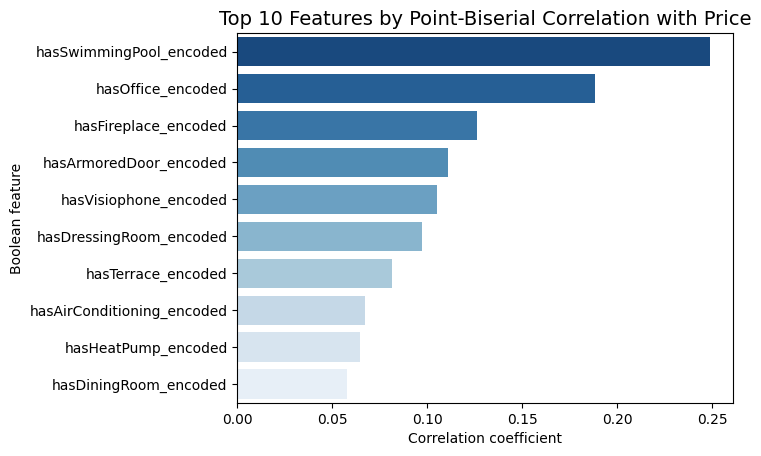

In [10]:
corr_series = pd.Series(point_biserial_corr).sort_values(ascending=False).head(10)

df_corr = corr_series.reset_index()
df_corr.columns = ['feature', 'correlation']
colors = sns.color_palette("Blues_r", n_colors=len(df_corr))

sns.barplot(
    data=df_corr,
    y='feature',
    x='correlation',
    palette=colors,
    orient='h'
)

plt.title("Top 10 Features by Point-Biserial Correlation with Price", fontsize=14)
plt.xlabel("Correlation coefficient")
plt.ylabel("Boolean feature")
plt.savefig('images/corr_with_price.png', pad_inches = 3)
plt.show()

#### Swimming Pool

In [ ]:

swimming_plot = sns.boxplot(x='hasSwimmingPool_encoded', y='price', data=df_encoded , showfliers=False )
plt.title('Price by hasSwimmingPool')
plt.show()

In [ ]:
correlation_swimm_pool = df_encoded['hasSwimmingPool_encoded'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'hasSwimmingPool': {correlation_swimm_pool}")

In [ ]:
stats.pointbiserialr(df_encoded['hasSwimmingPool'], df_encoded['price'] )

#### Province

In [ ]:
df_province =df_encoded[['price', 'province']]
df_province 

In [ ]:
df_province[['province']].value_counts()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='province', y='price', data=df_encoded,  showfliers=False )
plt.xticks(rotation=45)
plt.title('Price by Province')
plt.show()

#### Subtype

In [ ]:
df_subtype = df_encoded[['price', 'subtype', 'subtype_encoded']]
df_subtype

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtype', y='price', data=df_subtype,  showfliers=False )
plt.xticks(rotation=60)
plt.title('Price by subtype')
plt.show()

#### Habitable Surface

In [ ]:
df_encoded['habitableSurface'].describe()

In [ ]:
df_surface = df_encoded[['habitableSurface', 'price', 'type', 'subtype']]

In [ ]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_surface_wo_out, x='habitableSurface', y='price',  hue='type', palette='Set2' )
plt.title('Scatter Plot: Price vs Habitable Surface ')
plt.xlabel('Habitable Surface')
plt.ylabel('Price')
plt.show()

In [ ]:
correlation_surface= df_encoded['habitableSurface'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'habitableSurface': {correlation_surface}")

##### Surface histogram

In [ ]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

In [16]:
df_encoded['habitableSurface']

0        100.0
1        270.0
2         87.0
3        104.0
4         71.0
         ...  
76098    242.0
76099     94.0
76100    113.0
76101    111.0
76102    132.0
Name: habitableSurface, Length: 76103, dtype: float64

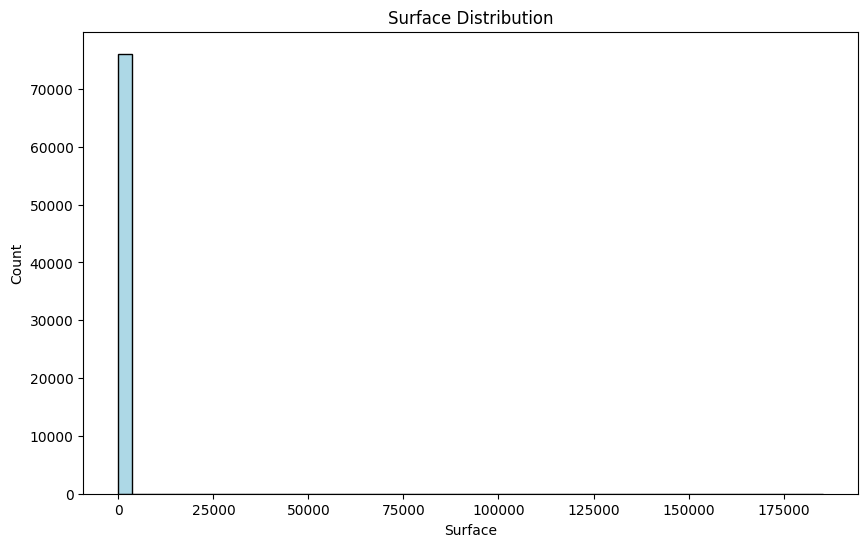

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['habitableSurface'], bins=50, color='lightblue', edgecolor='black')
plt.title('Surface Distribution')
plt.xlabel('Surface')
plt.ylabel('Count')
plt.show()

#### Number of bedrooms

In [ ]:
df_encoded['bedroomCount'].value_counts()

In [ ]:
df_bedroom = df_encoded[['bedroomCount', 'price']]
df_bedroom

In [ ]:
bedroom_plot = sns.boxplot(x='bedroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bedroom')
plt.show()

In [ ]:
correlation_bedroom = df_encoded['bedroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")

In [ ]:
#### Number of bedrooms


In [ ]:
df_encoded['bathroomCount'].value_counts()
df_bedroom = df_encoded[['bathroomCount', 'price']]
df_bedroom


In [ ]:
bedroom_plot = sns.boxplot(x='bathroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bathroom')
plt.show()
correlation_bedroom = df_encoded['bathroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")